# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
import os
import glob
import shutil

In [2]:
os.getcwd()

'/Users/junhyuk/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/심화세션/[0823] CNN'

In [ ]:
### Guideline for convenience ###
# 압축 풀기

In [4]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?
animal_count = []
class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog',
               'elephant', 'horse', 'sheep', 'spider', 'squirrel']
for each_class in class_names:
  globals()['{}'.format(each_class)] = sorted(glob.glob(f'./Animals-10/{each_class}/*'))
  animal_count.append(len(globals()['{}'.format(each_class)]))

animal_count

[2112, 1668, 3098, 1866, 4863, 1446, 2623, 1820, 4821, 1862]

In [5]:
# test에 넣을 이미지 개수 계산
animal_test_count = []

for count in animal_count:
  test_count = round(count*0.2)
  animal_test_count.append(test_count)

animal_test_count

[422, 334, 620, 373, 973, 289, 525, 364, 964, 372]

In [6]:
# train, test 폴더 경로 선언 & 만들기
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [7]:
# 폴더 경로 선언 & 만들기
train_path = []
test_path = []
for name in class_names:
  globals()['{}_train_path'.format(name)] = f'./train/{name}'
  globals()['{}_test_path'.format(name)] = f'./test/{name}'

  os.makedirs(globals()['{}_test_path'.format(name)], exist_ok=True)
  os.makedirs(globals()['{}_train_path'.format(name)], exist_ok=True)

  train_path.append(globals()['{}_train_path'.format(name)])
  test_path.append(globals()['{}_test_path'.format(name)])

In [8]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기
for idx, name in enumerate(class_names):
  split(globals()['{}'.format(name)], animal_test_count[idx], train_path[idx], test_path[idx])

train 폴더 이미지 개수 : 1690
test 폴더 이미지 개수 : 422
train 폴더 이미지 개수 : 1334
test 폴더 이미지 개수 : 334
train 폴더 이미지 개수 : 2478
test 폴더 이미지 개수 : 620
train 폴더 이미지 개수 : 1493
test 폴더 이미지 개수 : 373
train 폴더 이미지 개수 : 3890
test 폴더 이미지 개수 : 973
train 폴더 이미지 개수 : 1157
test 폴더 이미지 개수 : 289
train 폴더 이미지 개수 : 2098
test 폴더 이미지 개수 : 525
train 폴더 이미지 개수 : 1456
test 폴더 이미지 개수 : 364
train 폴더 이미지 개수 : 3857
test 폴더 이미지 개수 : 964
train 폴더 이미지 개수 : 1490
test 폴더 이미지 개수 : 372


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [31]:
import torch
import torchvision
import torchvision.transforms as transforms

In [32]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
transform_train = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [33]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
train_data = torchvision.datasets.ImageFolder(
    root = './train', # 바로 train 폴더 지정
    transform = transform_train # transform은 그냥 편의상 cifar에서 썼던거 그대로
)
test_data = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_test
)

In [34]:
# train, test에 대해 DataLoader 정의
trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      
    shuffle=True,         
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,
    shuffle=False,
    num_workers=2
)


In [14]:
import torch.nn as nn

In [13]:
len(testloader)

164

In [35]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.5),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.5),

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=3),
        nn.Dropout(0.5),

        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.5),
        
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.5)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(256*9*9,100),
        nn.ReLU(),
        nn.Linear(100,10)
    )
  def forward(self, x):
    out = self.layer(x)
    out = out.view(out.size(0), -1)

    out = self.fc_layer(out)
    return out

In [17]:
!pip install torchsummary

In [36]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
from torchsummary import summary
test_model = MyModel() # 모델 객체 선언
summary(test_model, (3,256,256), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 32, 260, 260]             896
              ReLU-2         [32, 32, 260, 260]               0
         MaxPool2d-3         [32, 32, 130, 130]               0
           Dropout-4         [32, 32, 130, 130]               0
            Conv2d-5         [32, 64, 134, 134]          18,496
              ReLU-6         [32, 64, 134, 134]               0
         MaxPool2d-7           [32, 64, 67, 67]               0
           Dropout-8           [32, 64, 67, 67]               0
            Conv2d-9          [32, 128, 71, 71]          73,856
             ReLU-10          [32, 128, 71, 71]               0
        MaxPool2d-11          [32, 128, 24, 24]               0
          Dropout-12          [32, 128, 24, 24]               0
           Conv2d-13          [32, 256, 28, 28]         295,168
             ReLU-14          [32, 256,

In [37]:
# Device 선언 (GPU 권장)
device = torch.device('mps')
device

device(type='mps')

In [38]:
# 모델 객체 선언
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.5, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=3, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout(p=0.5, inplace=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Dropout(p=0.5, inplace=False)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (17): ReLU()
    (18):

In [39]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) 

In [40]:
# train 함수 정의
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 256, 256])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.2784204483032227
tensor([4, 3, 4, 6, 4, 3, 6, 3, 9, 9, 6, 6, 6, 3, 3, 3, 9, 3, 6, 9, 6, 4, 6, 9,
        3, 4, 4, 8, 5, 4, 3, 5], device='mps:0')
tensor([4, 0, 8, 4, 5, 1, 1, 2, 1, 6, 4, 3, 6, 7, 4, 5, 7, 4, 4, 4, 4, 9, 5, 4,
        4, 9, 4, 7, 4, 4, 5, 4], device='mps:0')
4


In [41]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [42]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [43]:
# test 함수 정의
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [44]:
num_epoch = 40

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), './mymodel_Animals10.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 2.171311582326889

Current batch: 600
Average train loss of recent 300 batches: 1.9220743290583293

Total train accuarcy: 27.761065749892566
Total train loss: 2.024444100510983

[ Test epoch: 1 ]

Test accuarcy: 36.096256684491976
Test average loss: 1.8734629742982911

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 1.6196361541748048

Current batch: 600
Average train loss of recent 300 batches: 1.5067824323972066

Total train accuarcy: 46.69340591128301
Total train loss: 1.5566234059006203

[ Test epoch: 2 ]

Test accuarcy: 42.24598930481283
Test average loss: 1.686223320117811

[ Train epoch: 3 ]

Current batch: 300
Average train loss of recent 300 batches: 1.3805792584021885

Current batch: 600
Average train loss of recent 300 batches: 1.3290339934825897

Total train accuarcy: 53.311368953827056
Total train loss: 1.3526402168601523

[ Test epoch: 3 ]

Test accuarcy: 51.


Current batch: 600
Average train loss of recent 300 batches: 0.8376611263553302

Total train accuarcy: 72.04316478059495
Total train loss: 0.8217419665278369

[ Test epoch: 24 ]

Test accuarcy: 62.4331550802139
Test average loss: 1.130664401846688

[ Train epoch: 25 ]

Current batch: 300
Average train loss of recent 300 batches: 0.809520026644071

Current batch: 600
Average train loss of recent 300 batches: 0.8204408393303553

Total train accuarcy: 71.9285680179535
Total train loss: 0.8171628658098119

[ Test epoch: 25 ]

Test accuarcy: 58.42245989304813
Test average loss: 1.2240781965779095

[ Train epoch: 26 ]

Current batch: 300
Average train loss of recent 300 batches: 0.8091923296451569

Current batch: 600
Average train loss of recent 300 batches: 0.8131344039241473

Total train accuarcy: 71.87604450174283
Total train loss: 0.8139959204742927

[ Test epoch: 26 ]

Test accuarcy: 63.292589763178
Test average loss: 1.09908744638286

[ Train epoch: 27 ]

Current batch: 300
Average tr

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


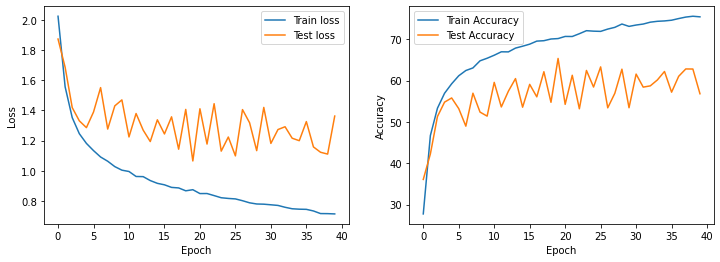

In [45]:
# loss, accuracy 추이 확인 with plt.plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(range(num_epoch), seq_train_loss, label="Train loss")
ax.plot(range(num_epoch), seq_test_loss, label="Test loss")
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax = fig.add_subplot(1,2,2)
ax.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
ax.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.show()